In [57]:
import pandas as pd

In [58]:
cd C:\Users\hp\Downloads

C:\Users\hp\Downloads


In [59]:
data=pd.read_excel(r"ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx")

In [60]:
data

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


### Q. Check for the null values 

In [61]:
data.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

### Q. Get basic information from data 

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


### Q. Describe the dataset 

In [63]:
data.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


### Q. Display scatterplot between Age & Total work Experience

In [64]:
import matplotlib.pyplot as plt

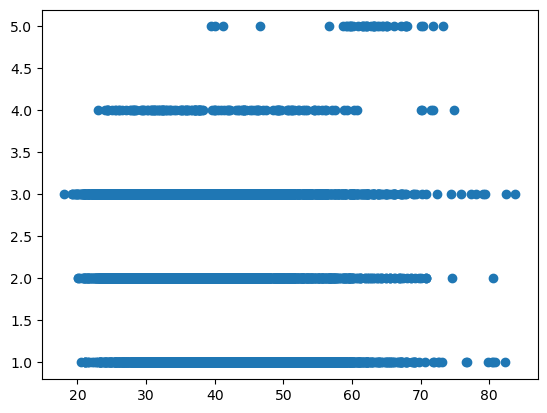

In [65]:
plt.scatter(data["Age"],data["Total Work Experience"])

### Q. Display box plot for age 

{'whiskers': [<matplotlib.lines.Line2D at 0x1885ad26990>,
 'caps': [<matplotlib.lines.Line2D at 0x1885acc4650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1885a853dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1885ad26490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1885ad258d0>],
 'means': []}

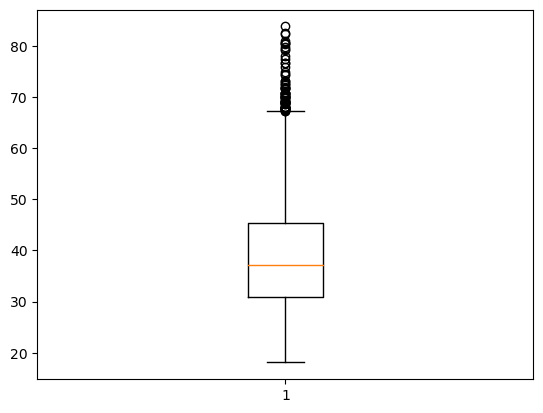

In [66]:
plt.boxplot(data["Age"])

### Q. Create target and features data where target is Total bounces past 12 months

In [67]:
x=data.drop(["Total bounces past12months"],axis=1)

In [68]:
y=data[["Total bounces past12months"]]

### Q. Split data into training and testing sets 

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=35)

### Q. Create a KNN classifier between features and target data

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
model=KNeighborsClassifier(n_neighbors=9)

In [73]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

### Q. Display the training score 

In [74]:
model.score(x_train,y_train)

0.6639799888827126

### Q. Display the test score

In [75]:
model.score(x_test,y_test)

0.6448026681489717

### Q. Print the accuracy score 

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
y_pred=model.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred)

0.6448026681489717

### Q. Try 1 to 14 k values for classifier 

In [79]:
train_score=[]
test_score=[]

for i in range(1,15):
    
    model = KNeighborsClassifier(i)
    model.fit(x_train,y_train)
    
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))

In [80]:
import warnings
warnings.filterwarnings("ignore")